In [4]:
from  matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import csv
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from  matplotlib.ticker import FuncFormatter
from matplotlib.pyplot  import savefig

In [2]:
sns.set_theme()

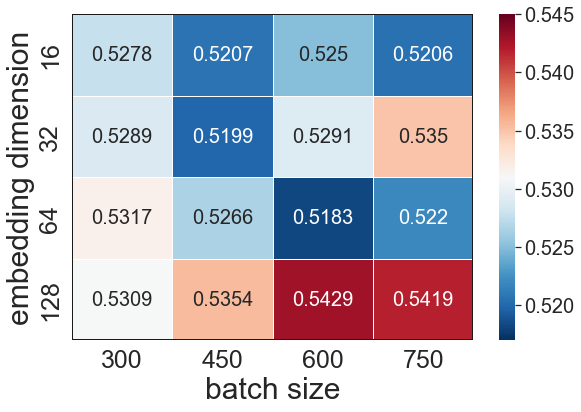

In [36]:


gridspace = [
    [16, 300, 0.5278],
    [32, 300, 0.5289],
    [64, 300, 0.5317],
    [128, 300, 0.5309],
    [16, 450, 0.5207],
    [32, 450, 0.5199],
    [64, 450, 0.5266],
    [128, 450, 0.5354],
    [16, 600, 0.5250],
    [32, 600, 0.5291],
    [64, 600, 0.5183],
    [128, 600, 0.5429],
    [16, 750, 0.5206],
    [32, 750, 0.5350],
    [64, 750, 0.5220],
    [128, 750, 0.5419],
]

df = pd.DataFrame(gridspace, columns=['batch size', 'embedding dimension', 'validation loss'])
heatmap = (
    df
    .pivot(index="batch size", columns="embedding dimension", values="validation loss")
)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatmap, annot=True, fmt='g', linewidths=.5, linecolor='white', ax=ax, cmap='RdBu_r',vmin = 0.517, vmax =0.545, annot_kws={"size": 20})
ax.tick_params(labelsize=25)
ax.set_xlabel("embedding dimension",fontsize=30)
ax.set_ylabel("batch size",fontsize=30)

ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=4, color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=4, color='k',linewidth=2)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

savefig('heat-bilstm.png', transparent=True)

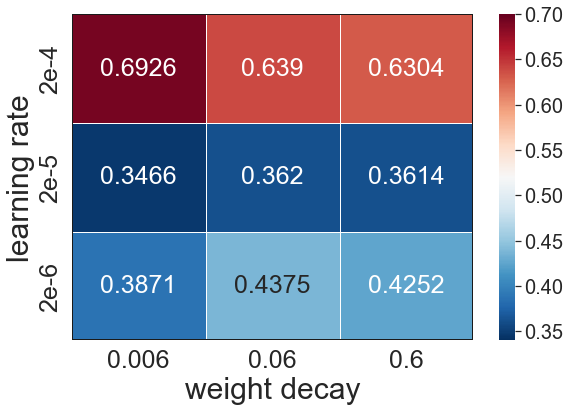

In [34]:


gridspace = [
    ['2e-4', 0.6, 0.6304],
    ['2e-4', 0.06, 0.6390],
    ['2e-4', 0.006, 0.6926],
    ['2e-5', 0.6, 0.3614],
    ['2e-5', 0.06, 0.3620],
    ['2e-5', 0.006, 0.3466],
    ['2e-6', 0.6, 0.4252],
    ['2e-6', 0.06, 0.4375],
    ['2e-6', 0.006, 0.3871]
]


df = pd.DataFrame(gridspace, columns=['learning rate', 'weight decay', 'validation loss'])

# Load the example flights dataset and convert to long-form
heatmap = (
    df
    .pivot(index="learning rate", columns="weight decay", values="validation loss")
)

# sns.set_palette(sns.color_palette("mako"))

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatmap, annot=True, fmt='g', linewidths=.5, ax=ax, cmap='RdBu_r',vmin = 0.34, vmax =0.7, annot_kws={"size": 25})
ax.tick_params(labelsize=25)
ax.set_xlabel("weight decay",fontsize=30)
ax.set_ylabel("learning rate",fontsize=30)

ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=3, color='k',linewidth=2)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=3, color='k',linewidth=2)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

savefig('heat-deberta.png', transparent=True)

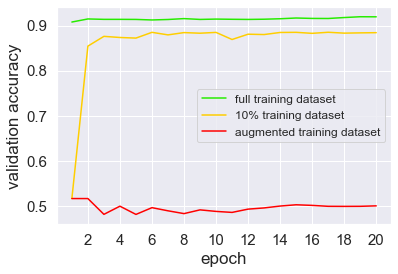

<Figure size 432x288 with 0 Axes>

In [86]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator



# yes ner
data = {
    'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'full training dataset': [0.907822, 0.914650,0.913760,0.913760,0.913611,0.912424,0.913463,0.915393,0.913611,0.914354,0.913908,0.913611,0.914057,0.915096,0.916729,0.915838,0.915689,0.917768,0.919549,0.919400],
    '10% training dataset': [0.516254,0.854386,0.876058,0.873534,0.872198,0.884964,0.879323,0.884370,0.883034,0.884815,0.869081,0.880807,0.880065,0.884667,0.884964,0.882737,0.885112,0.883182,0.883776,0.884221],
    'augmented training dataset': [0.516254,0.516254,0.481223,0.499332,0.481075,0.496066,0.489090,0.482856,0.491168,0.487754,0.485528,0.492801,0.495473,0.499629,0.502449,0.501113,0.499035,0.498887,0.499035,0.500074]
    }

sns.set_theme()

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_melted = df.melt(id_vars='epoch', var_name='Window size', value_name='f0.5-score')

# Create the line plot
sns.set_palette("husl")
ax = sns.lineplot(data=df_melted, x='epoch', y='f0.5-score', hue='Window size', palette=[
    '#27EC00',
    '#FFCE00',
    '#FF0000'
    ])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], prop={'size': 12})
ax.set_xlabel('epoch',fontsize=17)
ax.set_ylabel('validation accuracy',fontsize=17)
ax.tick_params(labelsize=15)
# ax.set_xticklabels([1,3,5,8,10,12,14,16,18,20]) 
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]) # <--- set the ticks first
plt.show()

savefig('line-deberta.png', transparent=True)



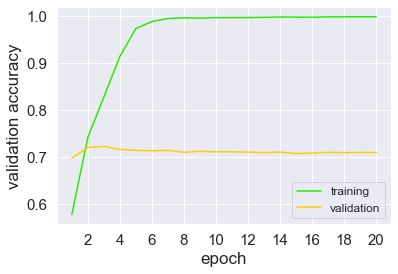

<Figure size 432x288 with 0 Axes>

In [10]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator



# yes ner
data = {
    'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'training': 0.01*np.array([57.87285992,74.282323,82.86272571,91.47440172,97.426607,98.89184118,99.5306902,99.69000403,99.60888198,99.72333132,99.73077859,99.73587271,99.79291871,99.8548652,99.8395108,99.8122252,99.88529238,99.89571106,99.91111795,99.900773]),
    'validation': 0.01*np.array([69.85305023,72.0943985,72.3615799,71.67878723,71.50066376,71.41160583,71.50066376,71.08505249,71.30770111,71.18895721,71.18895721,71.11473846,71.02568054,71.12957764,70.81787109,70.90692902,71.08505249,71.01083374,71.07020569,71.05536652]),
    }

sns.set_theme()

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to long format
df_melted = df.melt(id_vars='epoch', var_name='data', value_name='validation accuracy')

# Create the line plot
sns.set_palette("husl")
ax = sns.lineplot(data=df_melted, x='epoch', y='validation accuracy', hue='data', palette=[
    '#27EC00',
    '#FFCE00'
    ])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], prop={'size': 12})
ax.set_xlabel('epoch',fontsize=17)
ax.set_ylabel('validation accuracy',fontsize=17)
ax.tick_params(labelsize=15)
# ax.set_xticklabels([1,3,5,8,10,12,14,16,18,20]) 
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]) # <--- set the ticks first
plt.show()

savefig('line-bilstm.png', transparent=True)

